# Grafica de funciones de dominio en el plano complejo y llegada en el plano complejo

## Método 1: graficas Im - Re 

In [1]:
# Empezamos por importar las librerias que permitan trabajar con numeros complejos y graficas y operaciones matematicas avanzadas
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
from sympy import *

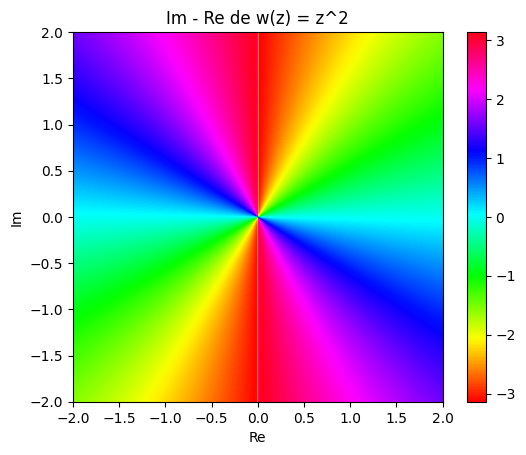

In [7]:
# grafica Im - Re de la funcion w(z) = z^2
def grafica_imre():
    # Definimos los valores de x e y
    x = np.linspace(-2, 2, 1000)
    y = np.linspace(-2, 2, 1000)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    W = Z**2
    # Graficamos la funcion
    plt.figure()
    plt.imshow(np.angle(W), extent=(x.min(), x.max(), y.min(), y.max()), cmap='hsv')
    plt.colorbar()
    plt.title('Im - Re de w(z) = z^2')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.show()
    
# probar el codigo
grafica_imre()

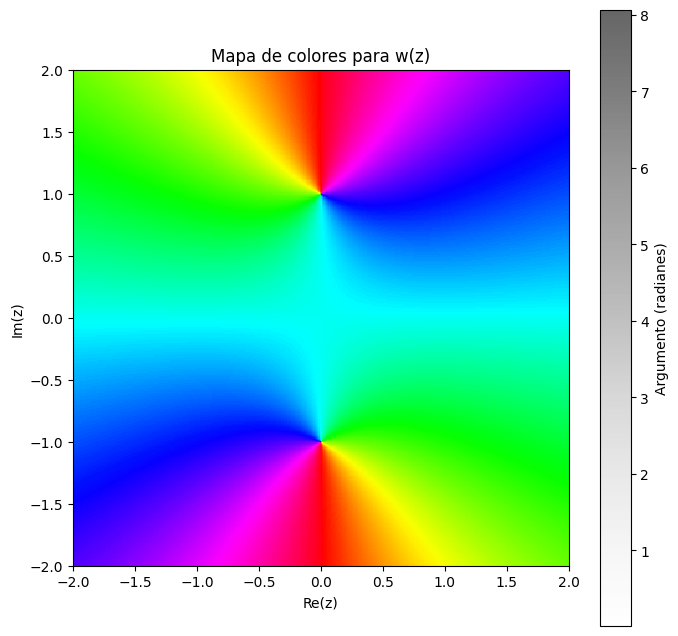

In [8]:
# Definimos el dominio
x = np.linspace(-2, 2, 400)  # Parte real
y = np.linspace(-2, 2, 400)  # Parte imaginaria
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Dominio complejo

# Definimos la función w(z)
def w(z):
    return z**2 + 1

W = w(Z)

# Calcular módulo y argumento
modulo = np.abs(W)
argumento = np.angle(W)

# Graficar
plt.figure(figsize=(8, 8))
plt.pcolormesh(X, Y, argumento, cmap='hsv', shading='auto')  # Tono para argumento
plt.imshow(modulo, extent=(-2, 2, -2, 2), cmap='Greys', alpha=0.6)  # Brillo para módulo
plt.colorbar(label='Argumento (radianes)')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Mapa de colores para w(z)')
plt.show()


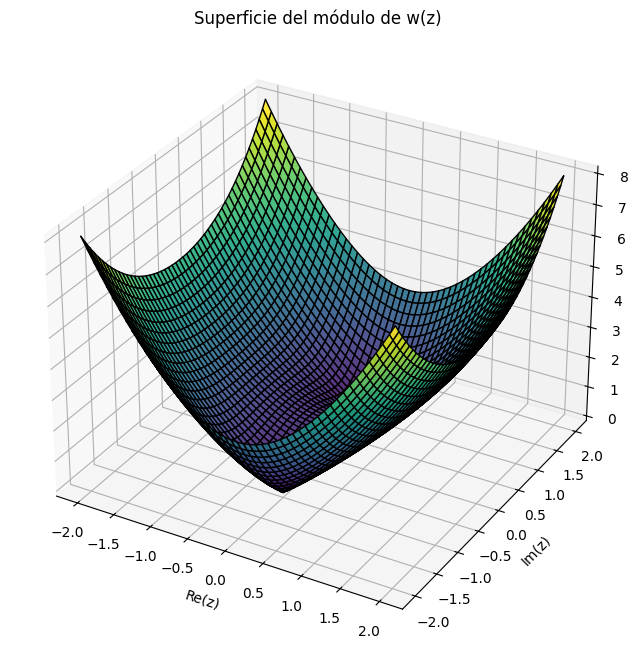

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Graficar el módulo en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, np.abs(W), cmap='viridis', edgecolor='k', alpha=0.9)
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('|w(z)|')
ax.set_title('Superficie del módulo de w(z)')
plt.show()


# Transformada de Fourier

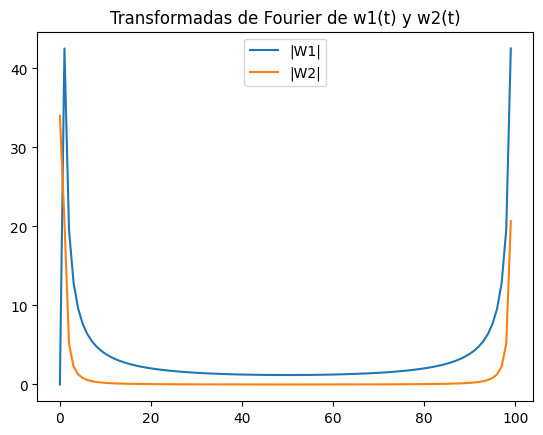

In [ ]:
# Definimos la funcion que nos permitira calcular la transformada de Fourier
def fourier_transform(x):
    N = len(x)
    X = []
    for k in range(N):
        X.append(0)
        for n in range(N):
            X[k] += x[n] * cmath.exp(-2j * cmath.pi * k * n / N)
    return X

# Definimos la funcion que nos permitira calcular la transformada inversa de Fourier
def inverse_fourier_transform(X):
    N = len(X)
    x = []
    for n in range(N):
        x.append(0)
        for k in range(N):
            x[n] += X[k] * cmath.exp(2j * cmath.pi * k * n / N)
        x[n] /= N
    return x

# Definimos la funcion que nos permitira calcular la transformada de Fourier de una funcion discreta

def fourier_transform_discrete(x):
    N = len(x)
    X = []
    for k in range(N):
        X.append(0)
        for n in range(N):
            X[k] += x[n] * cmath.exp(-2j * cmath.pi * k * n / N)
    return X

